# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [2]:
#Functions that find Black-Scholes value of CALL and PUT options

#Call option
def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    Computes the Black-Scholes value of a European call option.
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)

#Put option
def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    Computes the Black-Scholes value of a European put option.
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

A visual representation of how the Black-Scholes call option price changes with respect to time.

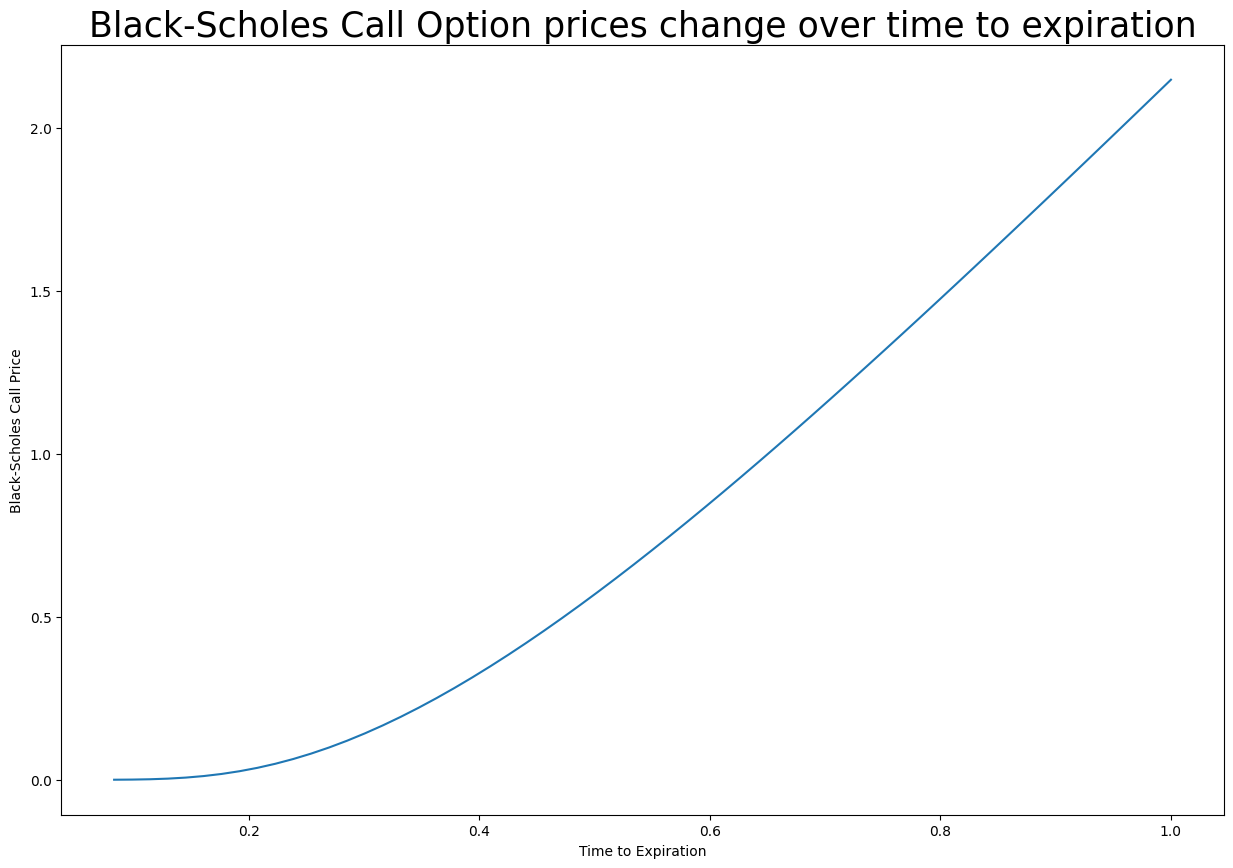

In [3]:
S0 = 150 # Spot price 
K = 185 # Strike Price
sigma = 0.19 # Volatility
times = np.linspace(1/12, 1, 60)  # 1 month to 5 years in monthly steps

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (15,10))
plt.title('Black-Scholes Call Option prices change over time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

(a) Use the visualization to interpret how the rate of change of the Black-Scholes call option price behaves as time progresses.

## Call Option -- Time Sensitivity:

The call option price generally increases with increasing time to expiration, as a longer timeframe provides more opportunity for the underlying stock to rise above the strike price, thereby increasing the option's value. This increase exhibits a concave relationship.

The Black-Scholes call option price generally rises with increasing time to expiration, which is logical: a longer timeframe gives the underlying stock more opportunity to move above the strike price, increasing the option's value. However, this increase isn't linear. The effect of added time is most significant early on; as time to expiration lengthens, each additional period yields a smaller increase in the option's price.


(b) Create a separate graphic to visualize how the rate of change of the Black-Scholes call option price depends on the spot price S(0)

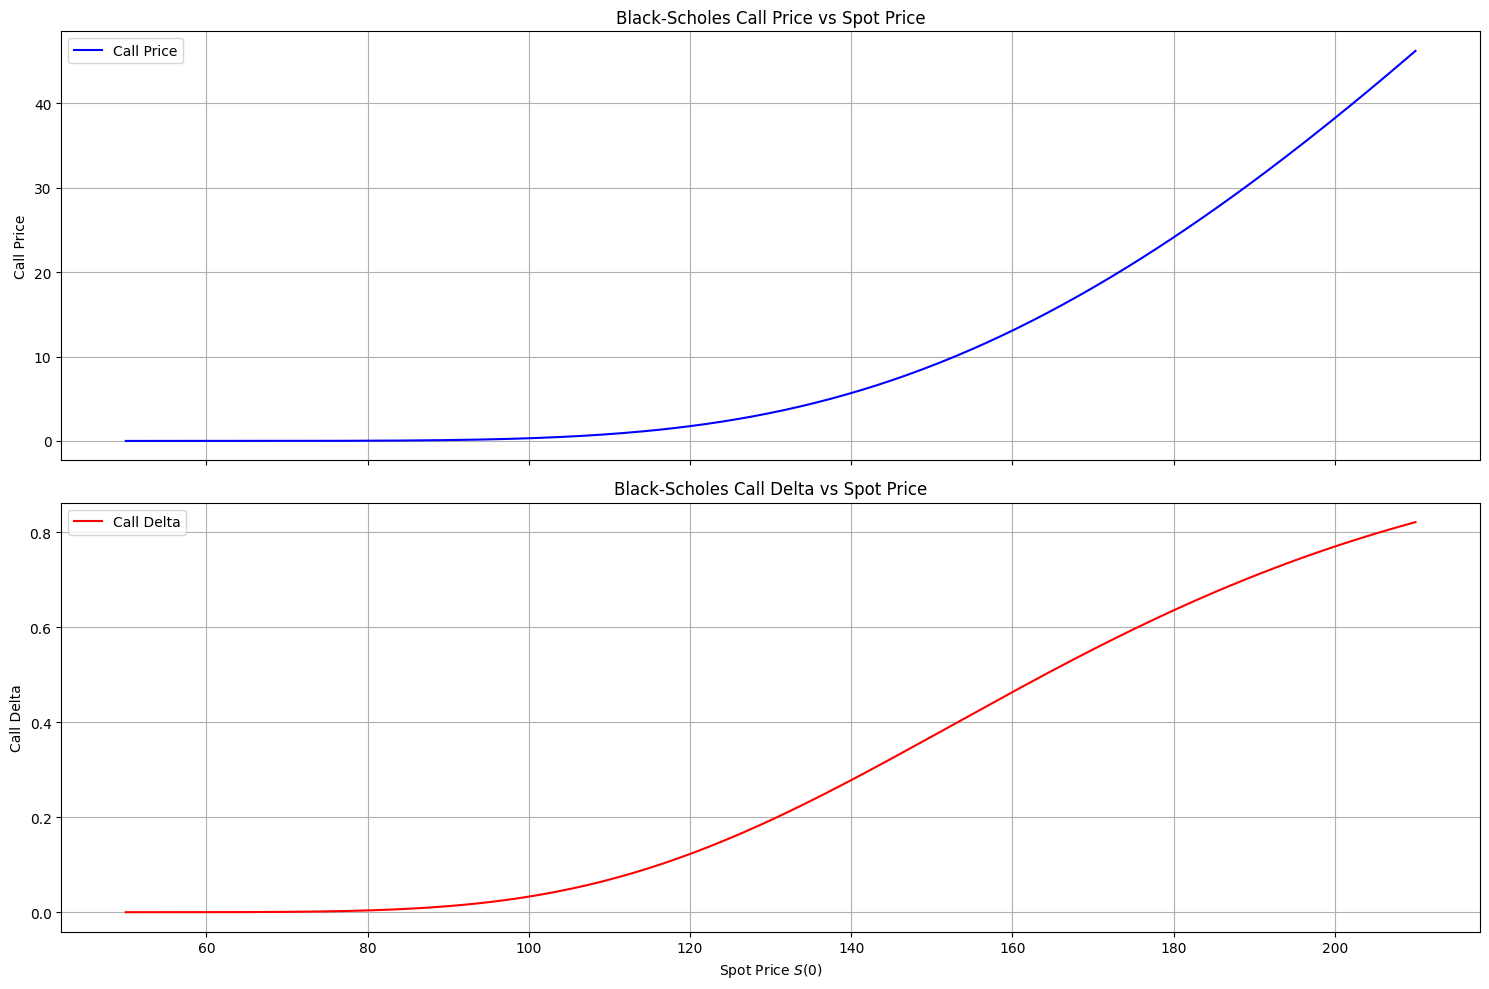

In [4]:
K = 170
sigma = 0.19
t = 2  
r = 0

# Range of Spot Prices
S_vals = np.linspace(50, 210, 250)

# Analytical Call Price and Delta
def d1(S, K, sigma, t, r):
    return (np.log(S/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))

call_prices = []
call_deltas = []

for S in S_vals:
    d1_val = d1(S, K, sigma, t, r)
    price = S * norm.cdf(d1_val) - K * np.exp(-r * t) * norm.cdf(d1_val - sigma * np.sqrt(t))
    delta = norm.cdf(d1_val)
    call_prices.append(price)
    call_deltas.append(delta)


# Plot Call Price and Delta
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

#Call Price vs Spot Price
ax[0].plot(S_vals, call_prices, label='Call Price', color='blue')
ax[0].set_title('Black-Scholes Call Price vs Spot Price')
ax[0].set_ylabel('Call Price')
ax[0].grid(True)
ax[0].legend()

# Analytical Delta vs Spot Price
ax[1].plot(S_vals, call_deltas, label='Call Delta', color='red')
ax[1].set_title('Black-Scholes Call Delta vs Spot Price')
ax[1].set_xlabel('Spot Price $S(0)$')
ax[1].set_ylabel('Call Delta')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()


## Call Option -- Spot Price Sensitivity:

The above examines the relationship between the call option price and the **spot price ($S(0)$)**, holding other factors constant.

This sensitivity is quantified by the Delta, which has been the primary focus of study in the latter parts of this course. For a European call option, Delta represents the change in option price resulting from a one-unit change in the underlying stock's value. Mathematically, this is given as:

$\text{Delta} := \frac{\partial C}{\partial S_0}$.

The plot illustrating call price versus spot price demonstrates that the call option's value increases as the underlying stock price ($S(0)$) rises. The resulting curve is upward-sloping and convex: when the stock price is below the strike price (K=170), the call is out-of-the-money and its price is low. As the stock price approaches and surpasses the strike, the option's value increases more rapidly.  For significantly in-the-money options (stock price above 160), the call price increases nearly linearly with the stock price, mirroring the behavior of owning the underlying asset.

The plot of call Delta versus spot price illustrates how sensitive the call option price is to changes in the spot price. When the stock price is considerably below the strike (around $S(0) = 80$), Delta is low, indicating that the option price is not highly responsive to small movements in the stock. Near the strike price (around $S(0)=180$), Delta is approximately 0.5, a typical value for at-the-money options. As the stock price moves well above the strike (beyond $S(0) = 200$), Delta appears to asymptotically approache 1.0 (as expected from the lecture discussion), suggesting that the call option's price closely tracks the price of the underlying stock itself.


In [5]:
# Analyze the put option time and spot sensitivity similar to the above. 

def bs_put(S, K, sigma, t, r=0):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return -S * norm.cdf(-d1) + K * np.exp(-r * t) * norm.cdf(-d2)

In [6]:
S0 = 150
K = 185
sigma = 0.19
r = 0
times = np.linspace(1/12, 5, 60)

put_prices = [bs_put(S0, K, sigma, t, r) for t in times]

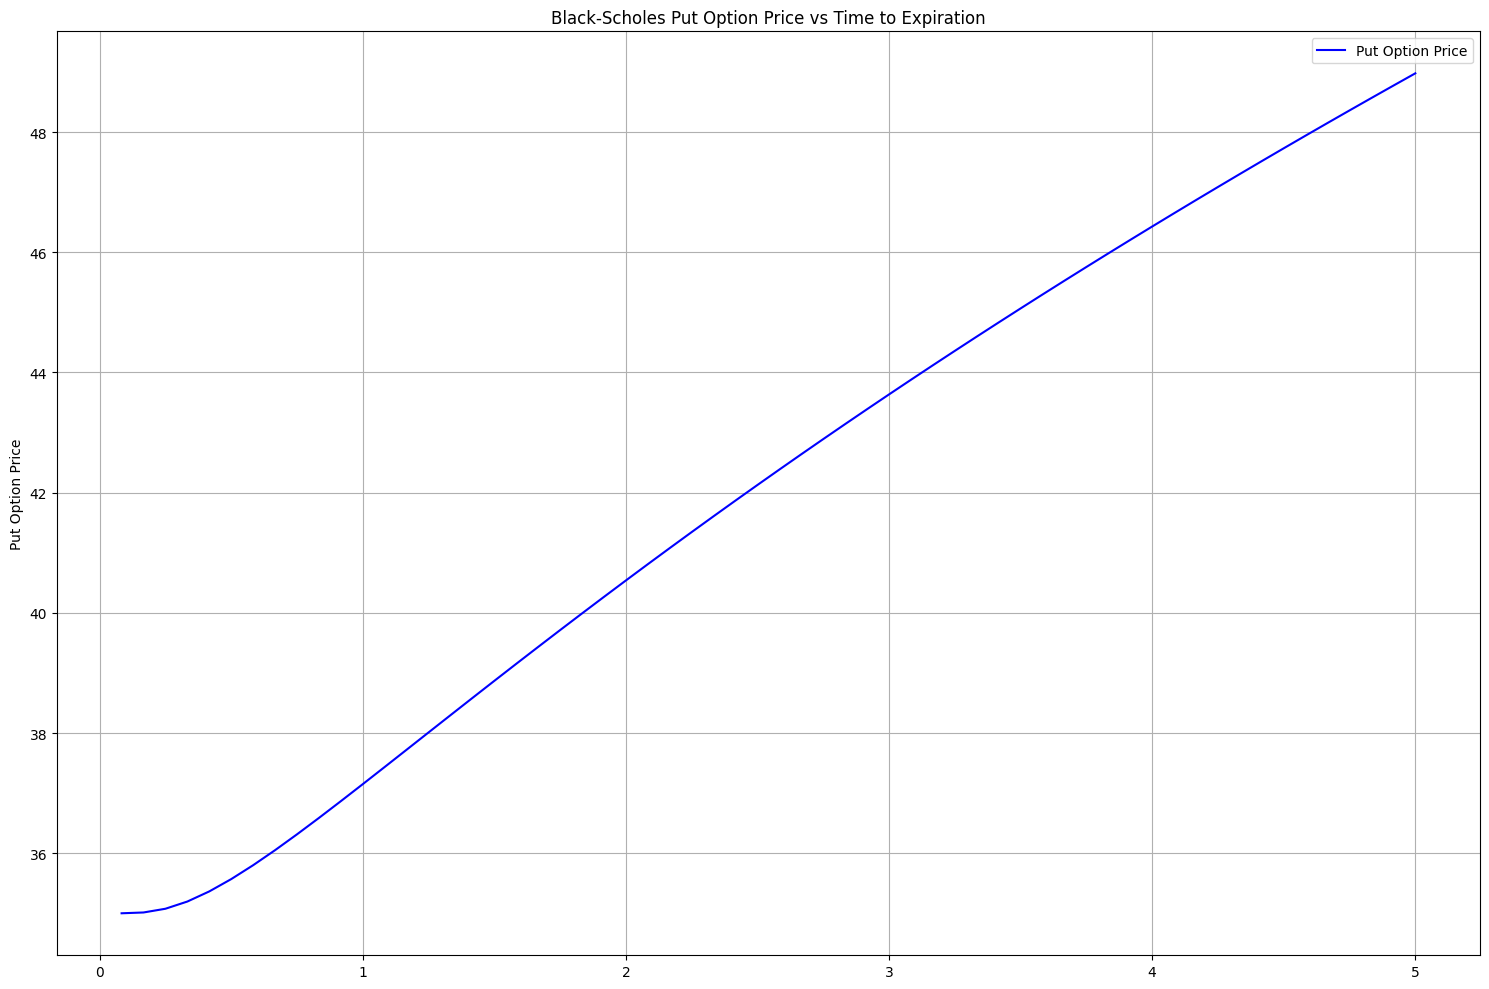

In [7]:
plt.figure(figsize=(15, 10))

plt.plot(times, put_prices, label='Put Option Price', color='blue')
plt.title('Black-Scholes Put Option Price vs Time to Expiration')
plt.ylabel('Put Option Price')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

## Put Option -- Time Sensitivity:

The put option price increases with increasing time to expiration due to the greater opportunity for the underlying asset to fall below the strike price, thus enhancing the value of downside protection. However, this increase follows a concave downward curve, indicating that the rate of price appreciation diminishes over time. This reflects the concept of diminishing marginal value: each additional period of time contributes less to the put option's value than the prior one.

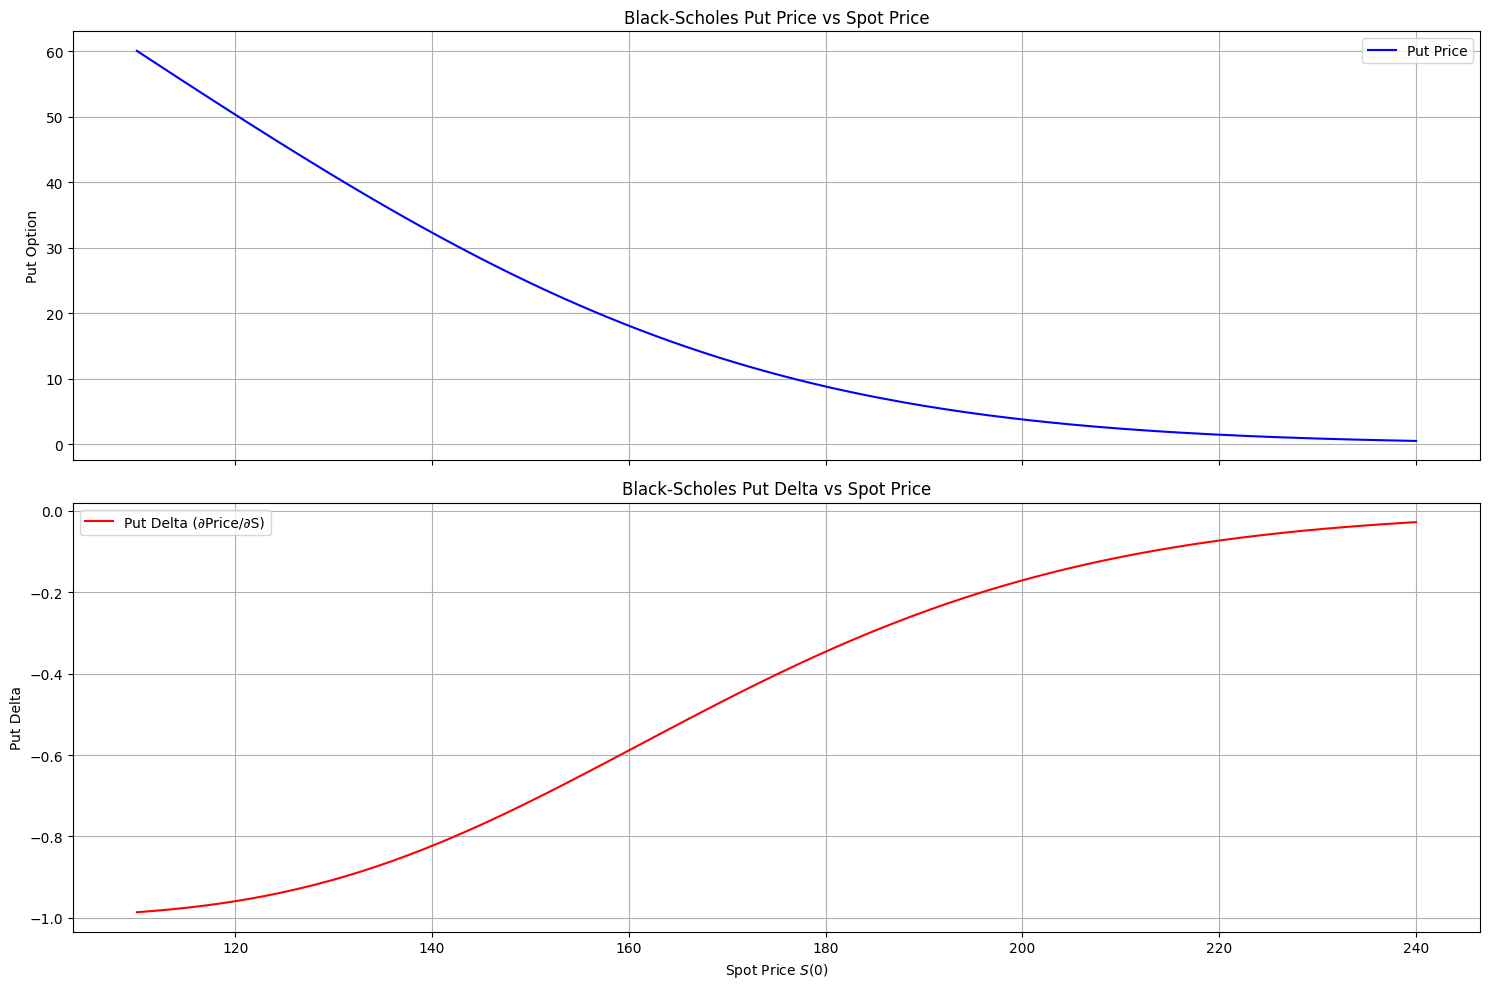

In [8]:
K = 170
sigma = 0.19
t = 2  
r = 0


def delta_put(S, K, sigma, t, r=0):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    return norm.cdf(d1) - 1  # analytical Delta for a put

S_vals = np.linspace(110, 240, 240)
put_prices_spot = [bs_put(S, K, sigma, t=1, r=0) for S in S_vals]
put_deltas = [delta_put(S, K, sigma, t=1, r=0) for S in S_vals]

fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

ax[0].plot(S_vals, put_prices_spot, label='Put Price', color='blue')
ax[0].set_title('Black-Scholes Put Price vs Spot Price')
ax[0].set_ylabel('Put Option')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(S_vals, put_deltas, label='Put Delta (∂Price/∂S)', color='red')
ax[1].set_title('Black-Scholes Put Delta vs Spot Price')
ax[1].set_xlabel('Spot Price $S(0)$')
ax[1].set_ylabel('Put Delta')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
